# Comparação entre dois algoritmos que listam números primos

A função de cada algoritmo é receber um número qualquer e devolver uma lista com todos os valores primos entre 0 e esse número.<br>
Abaixo estão ambas versões do algoritmo, com e sem otimização, e ambos são testados para valores de 1 até 1000, coletando-se o tempo necessário para trabalhar com cada valor dessa faixa de números e os dados são usados para criar um gráfico onde compara-se o desempenho de ambos os códigos.


### Importações necessárias

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Algoritmo otimizado

In [3]:
import time
from math import sqrt
list_timing = []
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        list_timing.append(end_time - start_time)
        return result, list_timing
    return wrapper

@timing_decorator
def primos (n):
    if n < 2: 
        return [] 

    is_primo = [True] * (n)
    is_primo[0] = is_primo[1] = False

    for i in range(2,int(sqrt(n))+1):
        if is_primo[i]:
            for c in range(i*i, n, i):
                if c in range(i*i, n, i):
                    is_primo[c] = False
    lista_primos = [i for i, primo in enumerate(is_primo) if primo]

    return lista_primos

for x in range(1001):
    primos(x)



## Algoritmo não otimizado

In [4]:
import time

list_timing2 = []
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        list_timing2.append(end_time - start_time)
        return result, list_timing
    return wrapper

@timing_decorator
def primos (n):
    lista_primos = []
    for i in range(2,n):
        primo = True
        for c in range(2, i):
            if i%c == 0: 
                primo = False
                break
        if primo:
            lista_primos.append(i)

    return lista_primos

for x in range(1001):
    primos(x)



# Plotando os valores 

## Gráfico sem suavização de curvas.

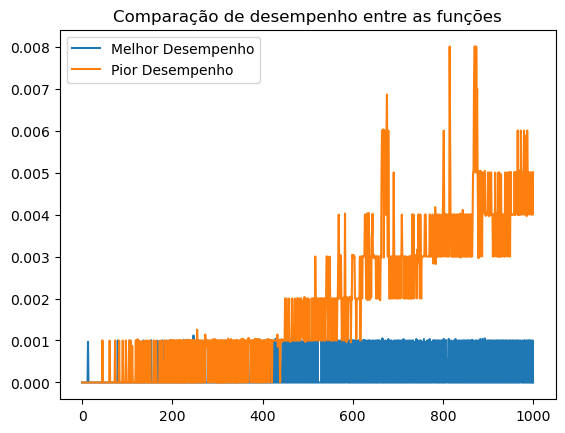

In [11]:
plt.plot(list_timing, label='Melhor Desempenho')
plt.plot(list_timing2, label='Pior Desempenho');
plt.legend(['Melhor Desempenho', 'Pior Desempenho']);
plt.title('Comparação de desempenho entre as funções');

## Gráfico com curvas de desempenho suavizado.

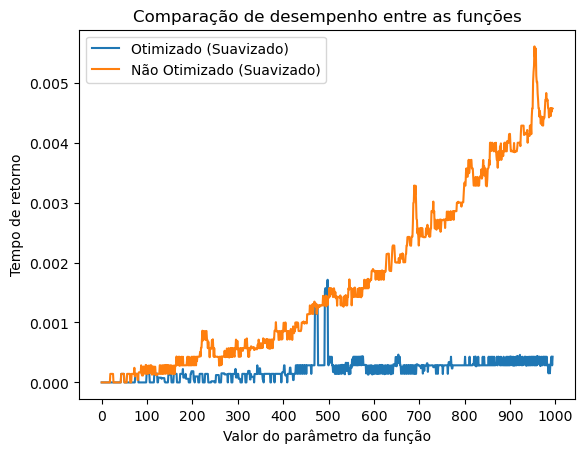

In [5]:
def smooth_data(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='valid')

window_size = 7
list_timing_smooth = smooth_data(list_timing, window_size)
list_timing2_smooth = smooth_data(list_timing2, window_size)


plt.plot(list_timing_smooth, label='Melhor Desempenho (Suavizado)')
plt.plot(list_timing2_smooth, label='Pior Desempenho (Suavizado)');
plt.legend(['Otimizado (Suavizado)', 'Não Otimizado (Suavizado)'])
plt.xlabel('Valor do parâmetro da função')
plt.xticks(np.arange(0,1001, 100))
plt.ylabel('Tempo de retorno')
plt.title('Comparação de desempenho entre as funções');

# Conclusão

A função sem melhora na performance começa a ter seu tempo de retorno escalando conforme os valores dos parâmetros aumentam mas a função com desempenho melhorado têm o tempo de retorno semelhante para cada um dos valores entre 0 e 1000, começando a escalar levemente por volta do número 600 mas continuando muito mais rápida que função sem melhora na performance.